In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

#Import 30-Year Fixed Rate Mortgage Average in the United States 
interest_rates_path = Path("interest_rates.csv")
interest_rates_df = pd.read_csv(interest_rates_path)


#Clean Data
interest_rates_df = interest_rates_df.rename(columns={'MORTGAGE30US_PCH': 'Percent Change'})
interest_rates_df = interest_rates_df.rename(columns={'DATE': 'Date'})
interest_rates_df


,Date,Percent Change
0,2016-09-01,0.72780
1,2016-10-01,0.28902
2,2016-11-01,8.64553
3,2016-12-01,11.35279
4,2017-01-01,-1.14340
...,...,...
80,2023-05-01,1.30075
81,2023-06-01,4.49805
82,2023-07-01,1.87668
83,2023-08-01,3.39181


In [2]:
#Import % Change of House Listings in FL
house_listings_path = Path("listingsfl.csv")
house_listings_df = pd.read_csv(house_listings_path)
house_listings_df = house_listings_df.rename(columns={'ACTLISCOUFL_PCH': 'Percent Change'})
house_listings_df = house_listings_df.rename(columns={'DATE': 'Date'})
house_listings_df


,Date,Percent Change
0,2016-09-01,-0.82021
1,2016-10-01,1.72422
2,2016-11-01,2.39340
3,2016-12-01,0.35360
4,2017-01-01,1.15925
...,...,...
80,2023-05-01,-1.76306
81,2023-06-01,0.95297
82,2023-07-01,1.73368
83,2023-08-01,2.15544


In [3]:
#Merge the two dataframes 
mergedintlistings_df = house_listings_df.merge(interest_rates_df, on='Date', suffixes=(' of New House Listings', ' of Interest Rates'))
mergedintlistings_df

,Date,Percent Change of New House Listings,Percent Change of Interest Rates
0,2016-09-01,-0.82021,0.72780
1,2016-10-01,1.72422,0.28902
2,2016-11-01,2.39340,8.64553
3,2016-12-01,0.35360,11.35279
4,2017-01-01,1.15925,-1.14340
...,...,...,...
80,2023-05-01,-1.76306,1.30075
81,2023-06-01,0.95297,4.49805
82,2023-07-01,1.73368,1.87668
83,2023-08-01,2.15544,3.39181


In [4]:
from scipy import stats

# Extract the independent and dependent variables
X = interest_rates_df['Percent Change']
y = house_listings_df['Percent Change']

# Fit the linear regression model
model = stats.linregress(X, y)

# Print the model coefficients
print('Intercept:', model.intercept)
print('Slope:', model.slope)

# Print the R-squared and p-value
print('R-squared:', model.rvalue**2)
print('p-value:', model.pvalue)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if 'p-value' < 'alpha':
    print("Reject the null hypothesis. There is no relationship between mortgage rates and house listings.")
else:
    print("Fail to reject the null hypothesis.  There is a relationship between mortgage rates and house listings.")

Intercept: -0.3512474310097058
Slope: 0.08538861812811603
R-squared: 0.004101853616821355
p-value: 0.5603458276175821
Fail to reject the null hypothesis.  There is a relationship between mortgage rates and house listings.


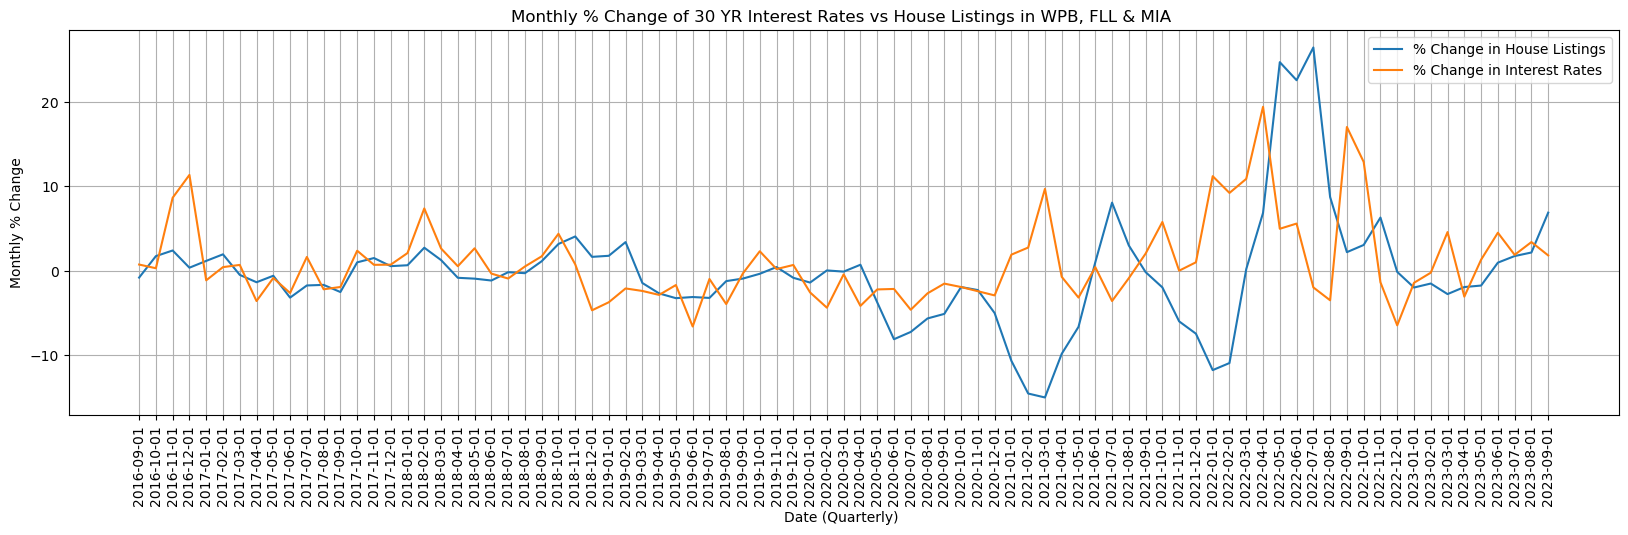

In [5]:
# Extract the x- and y-axes for each DataFrame
mergedintlistings_x = mergedintlistings_df["Date"]
mergedintlistings_y = house_listings_df["Percent Change"]
mergedintlistings_y1 = interest_rates_df["Percent Change"]

# Create the line chart
plt.figure(figsize=(20, 5))
plt.plot(mergedintlistings_x, mergedintlistings_y, label=("% Change in House Listings"))
plt.plot(mergedintlistings_x, mergedintlistings_y1, label=("% Change in Interest Rates "))


# Add a title, labels, and grid lines
plt.title("Monthly % Change of 30 YR Interest Rates vs House Listings in WPB, FLL & MIA ")
plt.ylabel("Monthly % Change")
plt.xlabel("Date (Quarterly) ")
plt.xticks(rotation=90)
#plt.ylim(280,450)
plt.grid(True)
plt.legend()


#Show the plot
plt.show()



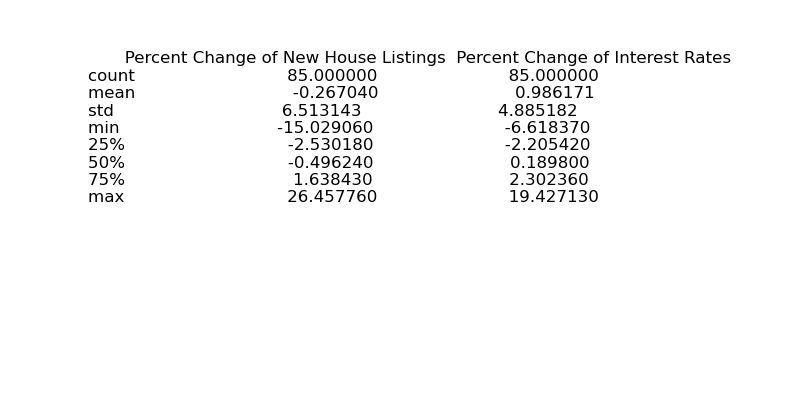

In [6]:
# Get the summary statistics as a string
describe_str = mergedintlistings_df.describe().to_string()

# Create a plot to render the text
fig, ax = plt.subplots(figsize=(10, 5))
ax.text(0.1, 0.5, describe_str, fontsize=12)

# Remove axis
ax.axis('off')

# Save the plot as an image
plt.savefig('mergedintlistings_summary.png', bbox_inches='tight', pad_inches=0.1)

# Show the plot (optional)
plt.show()

# Close the plot
plt.close()

In [7]:
The Percent Change of Listings is negative for the most part, while the Percent Change of Interest Rates is positive for the most part. This suggests that the number of listings is decreasing, while interest rates are increasing.
There is a weak positive correlation between the two datasets. This means that when the Percent Change of Listings is high, the Percent Change of Interest Rates is also likely to be high, and vice versa.
The mean and standard deviation of the Percent Change of Listings dataset are much higher than the mean and standard deviation of the Percent Change of Interest Rates dataset. This suggests that the Percent Change of Listings is more volatile than the Percent Change of Interest Rates.



SyntaxError: invalid syntax (1790072838.py, line 1)

In [ ]:
mergedintlistings_df.describe()